In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("athlete_events.csv.zip")
region_df = pd.read_csv("noc_regions.csv")

In [19]:
df.tail()


ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [20]:
df.shape

(271116, 15)

In [21]:
df = df[df["Season"]== "Summer"]

In [22]:
df.shape

(222552, 15)

In [23]:
df.tail()


ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [24]:
df = df.merge(region_df,on='NOC',how = 'left')

In [25]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [26]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [27]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [28]:
df.duplicated().sum()

1385

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [32]:
df =pd.concat([df,pd.get_dummies(df['Medal'])],axis = 1)

In [33]:
df.shape

(221167, 20)

In [34]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [35]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [36]:
medal_tally


ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze   Gold  Silver  
0             China   NaN   False  False   False  
1             China   NaN   False  False   False  
2           Denmark   NaN   False  False   False  
3           Denmark   NaN   False   True   False  
4       Netherlands   NaN   False  False   False  
...             ...   ...     ...    ...     ...  
222528       Russia   NaN   False  False    True  
222530       Russia   NaN    True  False   False  
222536       Poland   NaN   False  False   False  
222537       Poland   NaN   False  False   False  
222541       Greece   NaN   False  False   False  

[105636 rows x 20 columns]

In [37]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

In [38]:
medal_tally['Total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [39]:
medal_tally

NOC  Gold  Silver  Bronze  Total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [40]:
years = df['Year'].unique().tolist()

In [41]:
years.sort()

In [42]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [43]:
years.insert(0,'Overall')

In [44]:
country = np.unique(df['region'].dropna().values).tolist()

In [45]:
country.sort()

In [46]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [47]:
country.insert(0,'Overall')

In [48]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [49]:
def fetch_medal_tally(df,years,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag= 0
    if years == 'Overall' and country == 'Overall':
      temp_df = medal_df
    if years == 'Overall' and country != 'Overall':
      flag=1
      temp_df = medal_df[medal_df['region']== country]
    if years != 'Overall' and country == 'Overall':
      temp_df = medal_df[medal_df['Year'] == int(years)]
    if years != 'Overall' and country != 'Overall':
      temp_df = medal_df[(medal_df[ 'Year'] == int(years)) & (medal_df['region'] == country)]

    if flag == 1:
       x = temp_df.groupby('Year').sum()[[ 'Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
       x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending =False).reset_index()

       x['Total'] = x['Gold']+ x['Silver']+ x['Bronze']

       print(x)

In [50]:
#overall analysis

In [51]:
df['Year'].unique().shape[0]-1

28

In [52]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [53]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [54]:
df['Event'].unique().shape

(651,)

In [55]:
df['Name'].unique().shape

(116122,)

In [56]:
df['region'].unique().shape

(206,)

In [57]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [58]:
nations_over_time =df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [59]:
nations_over_time.rename(columns={'Year': 'Edition','count': 'No of countries'},inplace=True)

In [60]:
import plotly.express as px

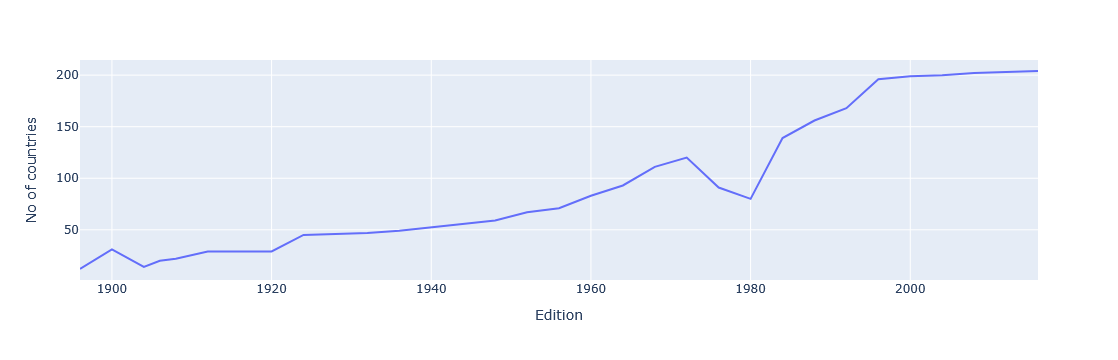

In [61]:
fig = px.line(nations_over_time, x="Edition",y="No of countries")
fig.show()

In [62]:
 df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [63]:
 df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896    176
25  1900   1220
27  1904    650
26  1906    841
23  1908   2024
22  1912   2409
21  1920   2675
19  1924   3256
20  1928   3246
24  1932   1922
16  1936   4482
17  1948   4402
15  1952   4931
18  1956   3346
12  1960   5348
14  1964   5134
11  1968   5552
8   1972   7105
10  1976   6070
13  1980   5252
9   1984   6791
7   1988   8443
6   1992   9380
5   1996  10324
2   2000  10639
3   2004  10537
1   2008  10880
4   2012  10502
0   2016  11174

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

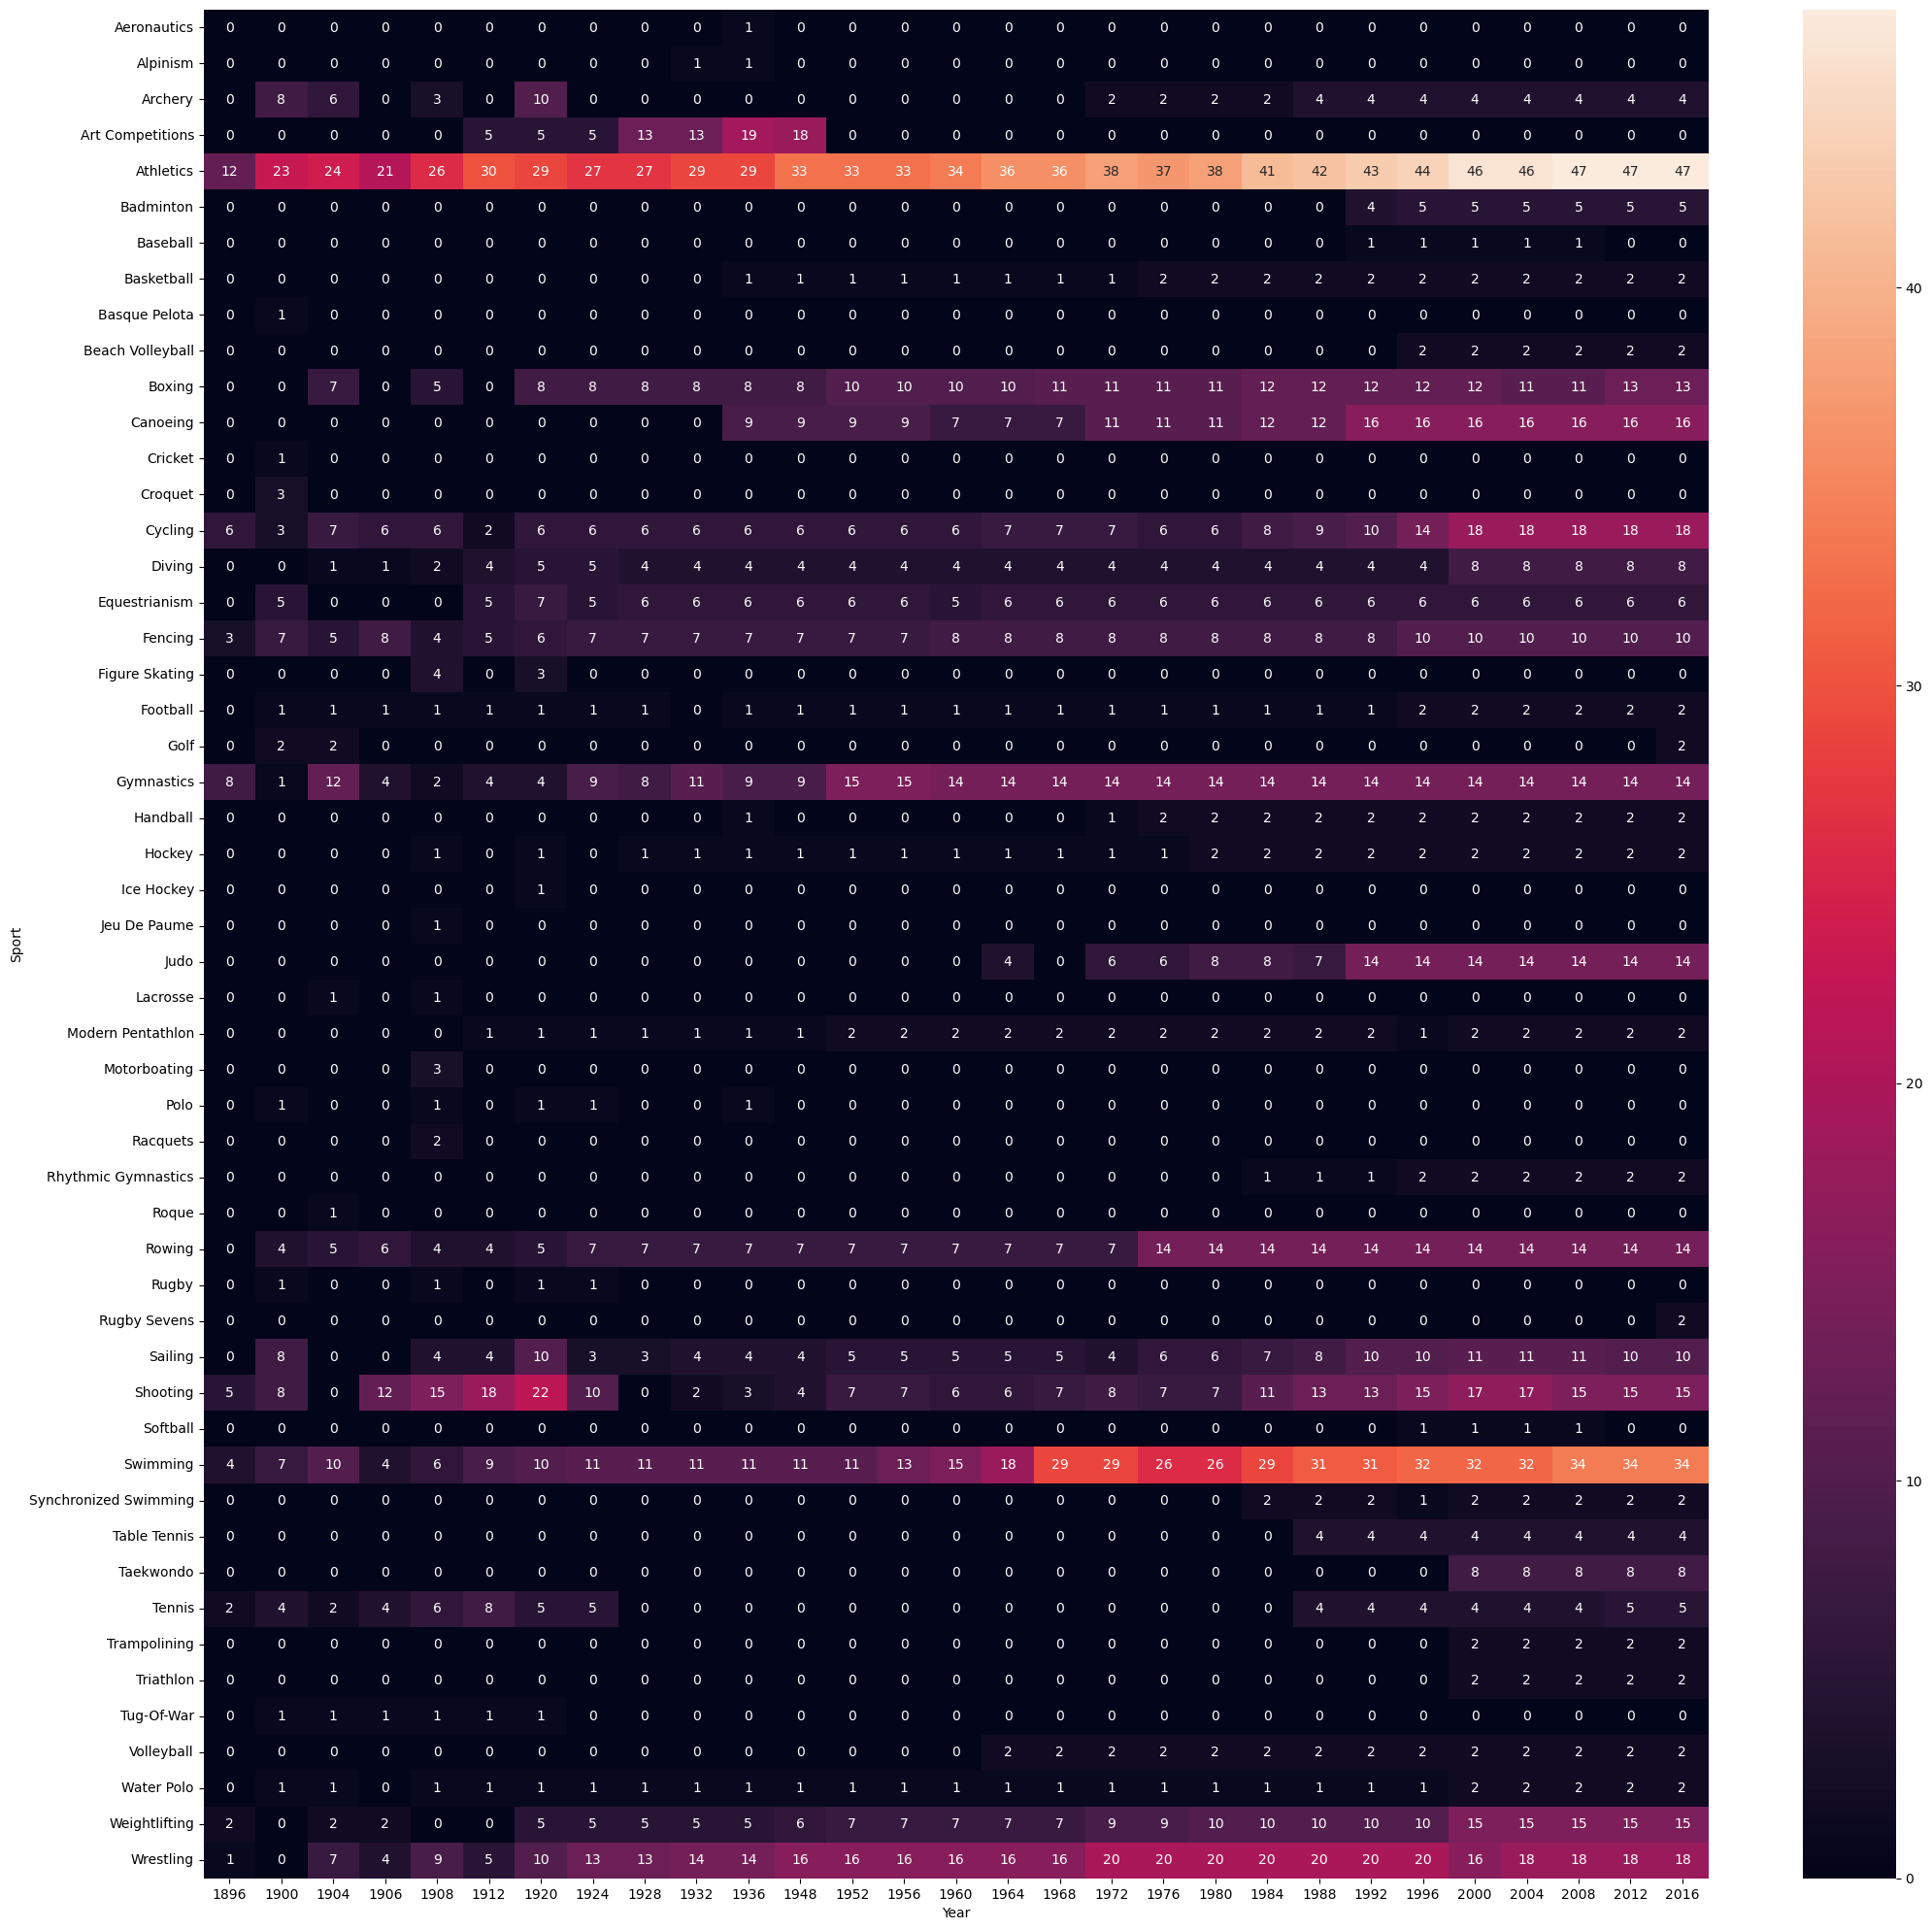

In [208]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [120]:
def most_successful(df, sport):
    # Filter out rows without a medal
    temp_df = df.dropna(subset=['Medal'])

    # If a specific sport is given, filter by that sport
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Count medals per athlete
    top_athletes = temp_df['Name'].value_counts().reset_index()
    top_athletes.columns = ['Name', 'Medal Count']  # Rename columns for clarity

    # Merge to get athlete details
    final_df = top_athletes.head(15).merge(df, on='Name', how='left')[['Name','Medal Count','Sport','region']].drop_duplicates('Name')

    return final_df


In [122]:
most_successful(df,'Overall')

Name  Medal Count       Sport  \
0                            Michael Fred Phelps, II           28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)           18  Gymnastics   
49                      Nikolay Yefimovich Andrianov           15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin           13  Gymnastics   
97                                       Takashi Ono           13  Gymnastics   
130                              Edoardo Mangiarotti           13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)           12    Swimming   
157                          Aleksey Yuryevich Nemov           12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)           12    Swimming   
195                           Birgit Fischer-Schmidt           12    Canoeing   
208                               Ryan Steven Lochte           12    Swimming   
222                             Paavo Johannes Nurmi           12   Athletics   
234                                       Sawao Kato           12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)           12    Swimming   
270                   Matthew Nicholas "Matt" Biondi           11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

In [124]:
#country-wise

In [126]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\arpit\AppData\Local\Temp\ipykernel_19504\3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

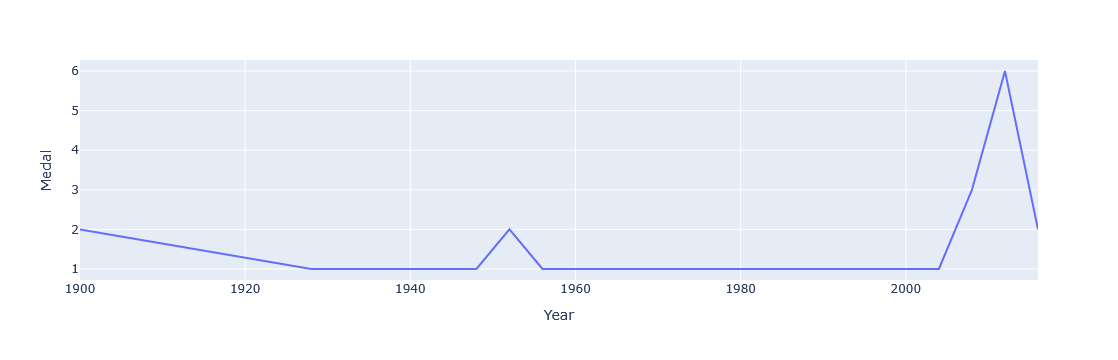

In [130]:
fig = px.line(final_df,x="Year",y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

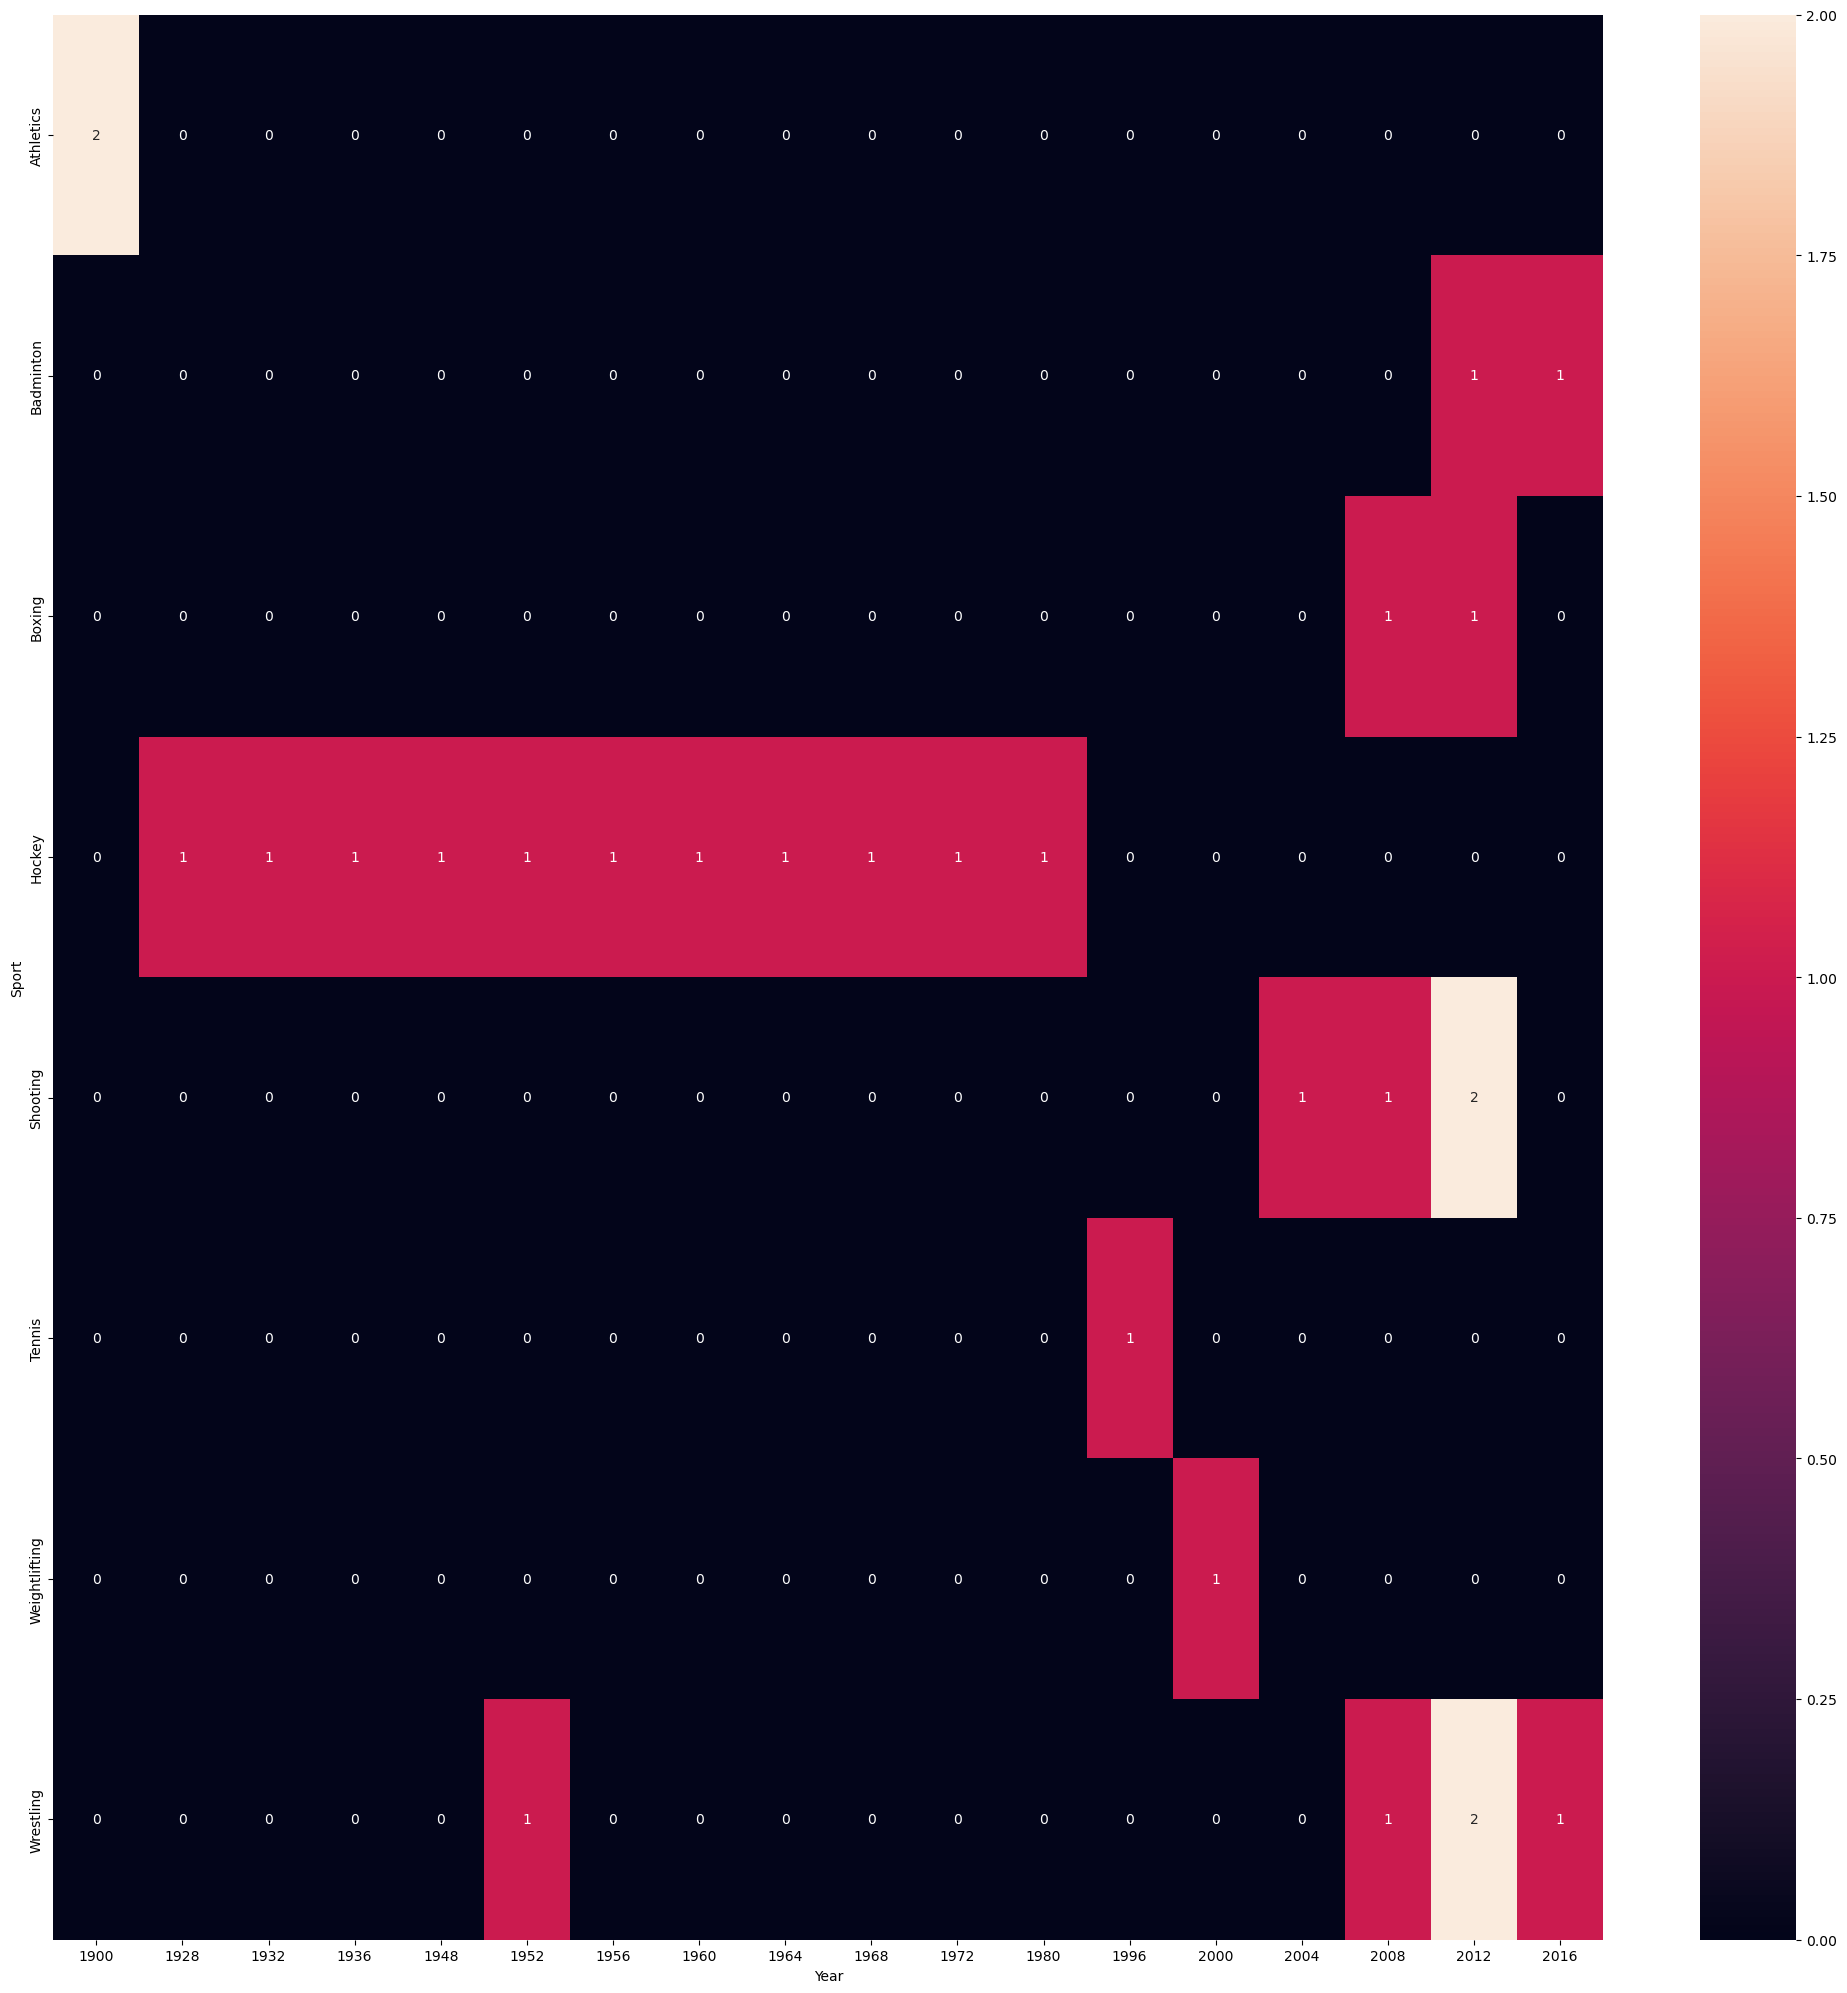

In [138]:
new_df = temp_df[temp_df['region']=='India']
plt.figure(figsize=(25,25))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc = 'count').fillna(0),annot=True)

In [148]:
def most_successful(df, country):
    # Filter out rows without a medal
    temp_df = df.dropna(subset=['Medal'])

    # If a specific sport is given, filter by that sport
    
    temp_df = temp_df[temp_df['region'] == country]

    # Count medals per athlete
    top_athletes = temp_df['Name'].value_counts().reset_index()
    top_athletes.columns = ['Name', 'Medal Count']  # Rename columns for clarity

    # Merge to get athlete details
    final_df = top_athletes.head(15).merge(df, on='Name', how='left')[['Name','Medal Count','Sport',]].drop_duplicates('Name')

    return final_df


In [150]:
most_successful(df,'India')

Name  Medal Count      Sport
0           Udham Singh Kular            4     Hockey
4      Leslie Walter Claudius            4     Hockey
8       Shankar Pillay Laxman            3     Hockey
11        Ranganathan Francis            3     Hockey
14        Richard James Allen            3     Hockey
17               Balbir Singh            3     Hockey
20     Harbinder Singh Chimni            3     Hockey
23  Balbir Singh Dosanjh, Sr.            3     Hockey
26  Victor John "V. J." Peter            3     Hockey
29           Dhyan Chand Bais            3     Hockey
32            Prithipal Singh            3     Hockey
35       Randhir Singh Gentle            3     Hockey
38            Roop Singh Bais            2     Hockey
40           Hari Pal Kaushik            2     Hockey
42       Sushil Kumar Solanki            2  Wrestling

In [156]:
import plotly.figure_factory as ff

In [158]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [163]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [165]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

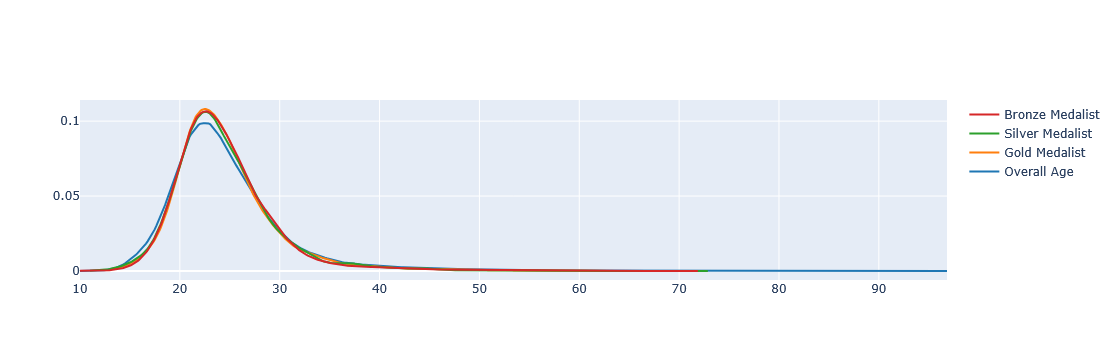

In [169]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [179]:
 famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [185]:
 x = []
name = []
for sport in famous_sports:
        temp_df = athlete_df[athlete_df['Sport']==sport]
        x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
        name.append(sport)

In [187]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)

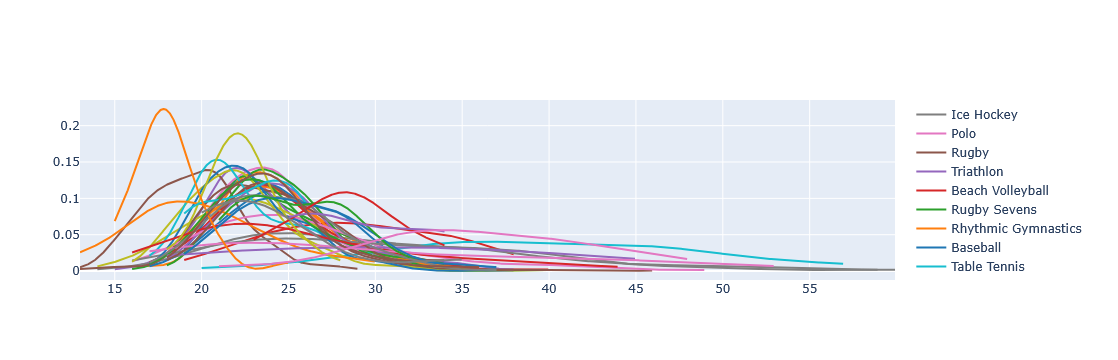

In [189]:
fig.show()

In [191]:
athlete_df['Medal'].fillna('No Model',inplace=True)

C:\Users\arpit\AppData\Local\Temp\ipykernel_19504\93136484.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

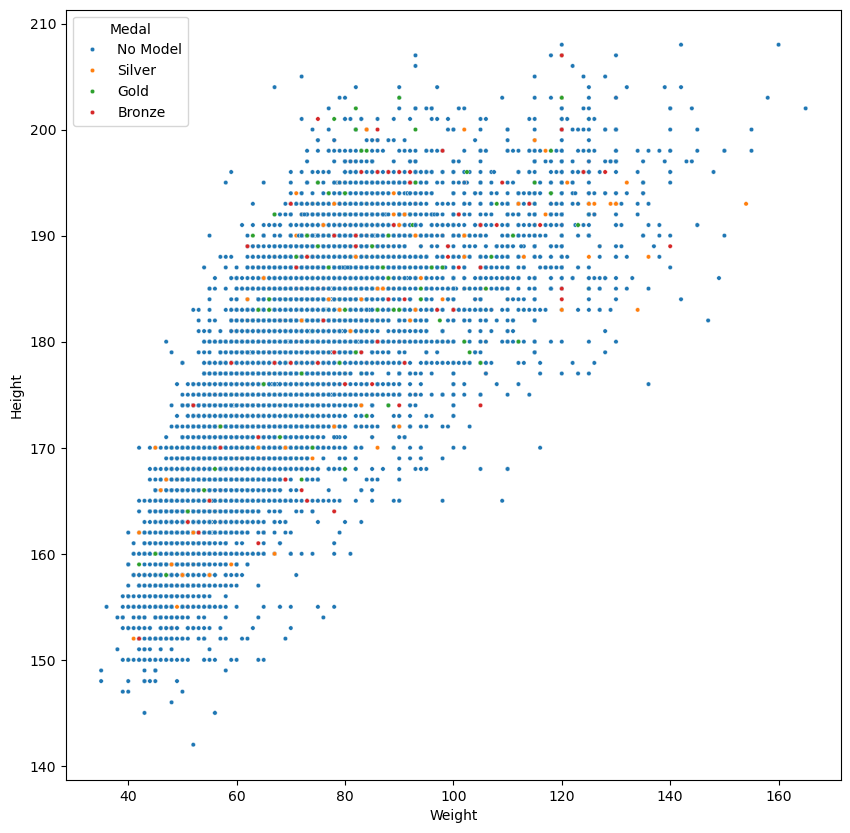

In [201]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] =='Athletics']
sns.scatterplot(x='Weight', y='Height', hue='Medal', data=temp_df,s=10)